### Business Case : To predict future flight prices and plan the journey accordingly.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_excel("Flight_Fare.xlsx")

#### Domain Analysis

- Airline : So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
- Date_of_Journey : This column will let us know about the date on which the passenger’s journey will start.
- Source : This column holds the name of the place from where the passenger’s journey will start.
- Destination : This column holds the name of the place to where passengers wanted to travel.
- Route : Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.
- Arrival_Time : Arrival time is when the passenger will reach his/her destination.
- Duration : Duration is the whole period that a flight will take to complete its journey from source to destination.
- Total_Stops : This will let us know in how many places flights will stop there for the flight in the whole journey.
- Additional_Info : In this column, we will get information about food, kind of food, and other amenities.
- Price : Price of the flight for a complete journey including all the expenses before onboarding.

#### Basic Checks

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
data.shape

(10683, 11)

- There are 10683 rows and 11 columns.

#### Target - Price

#### EDA

##### Univariate Analysis

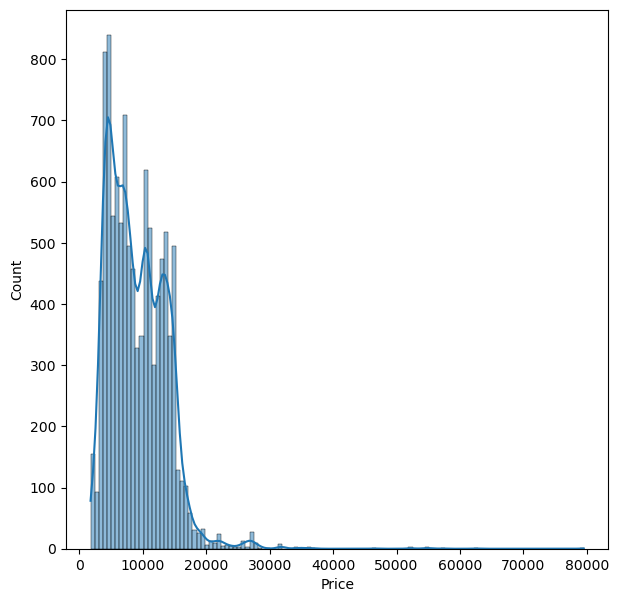

In [9]:
plt.figure(figsize=(7,7))
sns.histplot(x=data['Price'],kde=True)
plt.show()

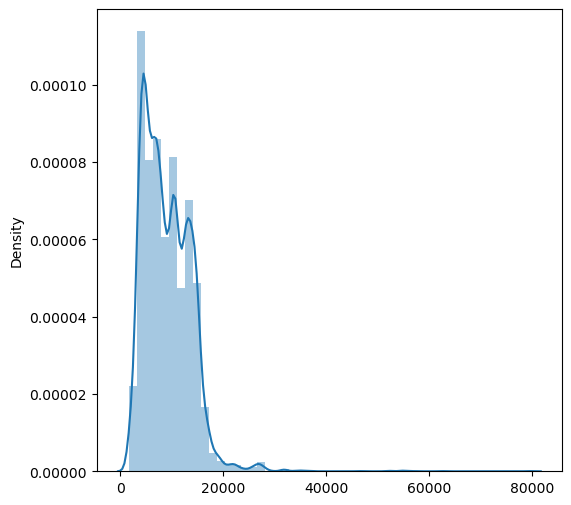

In [10]:
plt.figure(figsize=(6,6))
sns.distplot(x=data['Price'],kde=True)
plt.show()

In [11]:
data['Price'].skew()

1.8125523782189141

In [12]:
data['Price'].kurtosis()

13.303329535944567

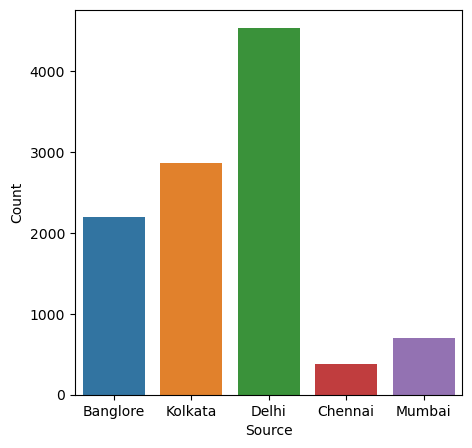

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x='Source',data=data)
plt.xlabel('Source', size=10)
plt.ylabel('Count', size=10)
plt.show()

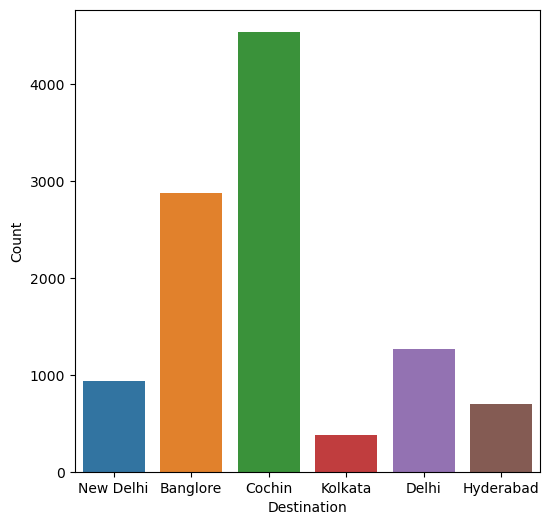

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='Destination',data=data)
plt.xlabel('Destination', size=10)
plt.ylabel('Count', size=10)
plt.show()

#### Bivariate Analysis

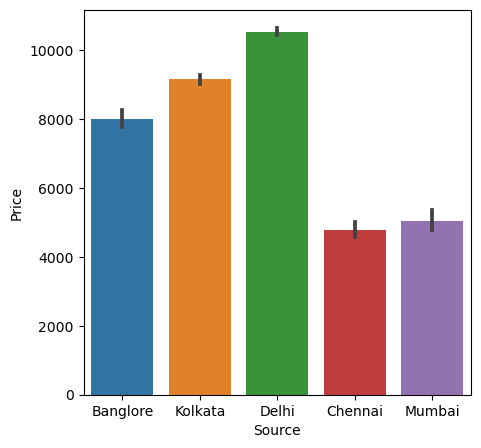

In [15]:
plt.figure(figsize=(5,5))
sns.barplot(x='Source',y='Price',data=data)
plt.xlabel('Source', size=10)
plt.ylabel('Price', size=10)
plt.show()

- Flight prices is quite high in Delhi than compared to other sources.

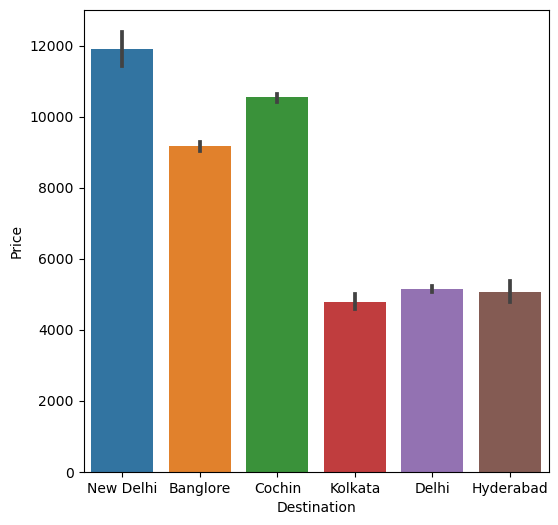

In [16]:
plt.figure(figsize=(6,6))
sns.barplot(x='Destination',y='Price',data=data)
plt.xlabel('Destination', size=10)
plt.ylabel('Price', size=10)
plt.show()

- Prices are quite high for Delhi as destination.
- Flight Fare for kolkata is comparatively low as compared to other destinations.

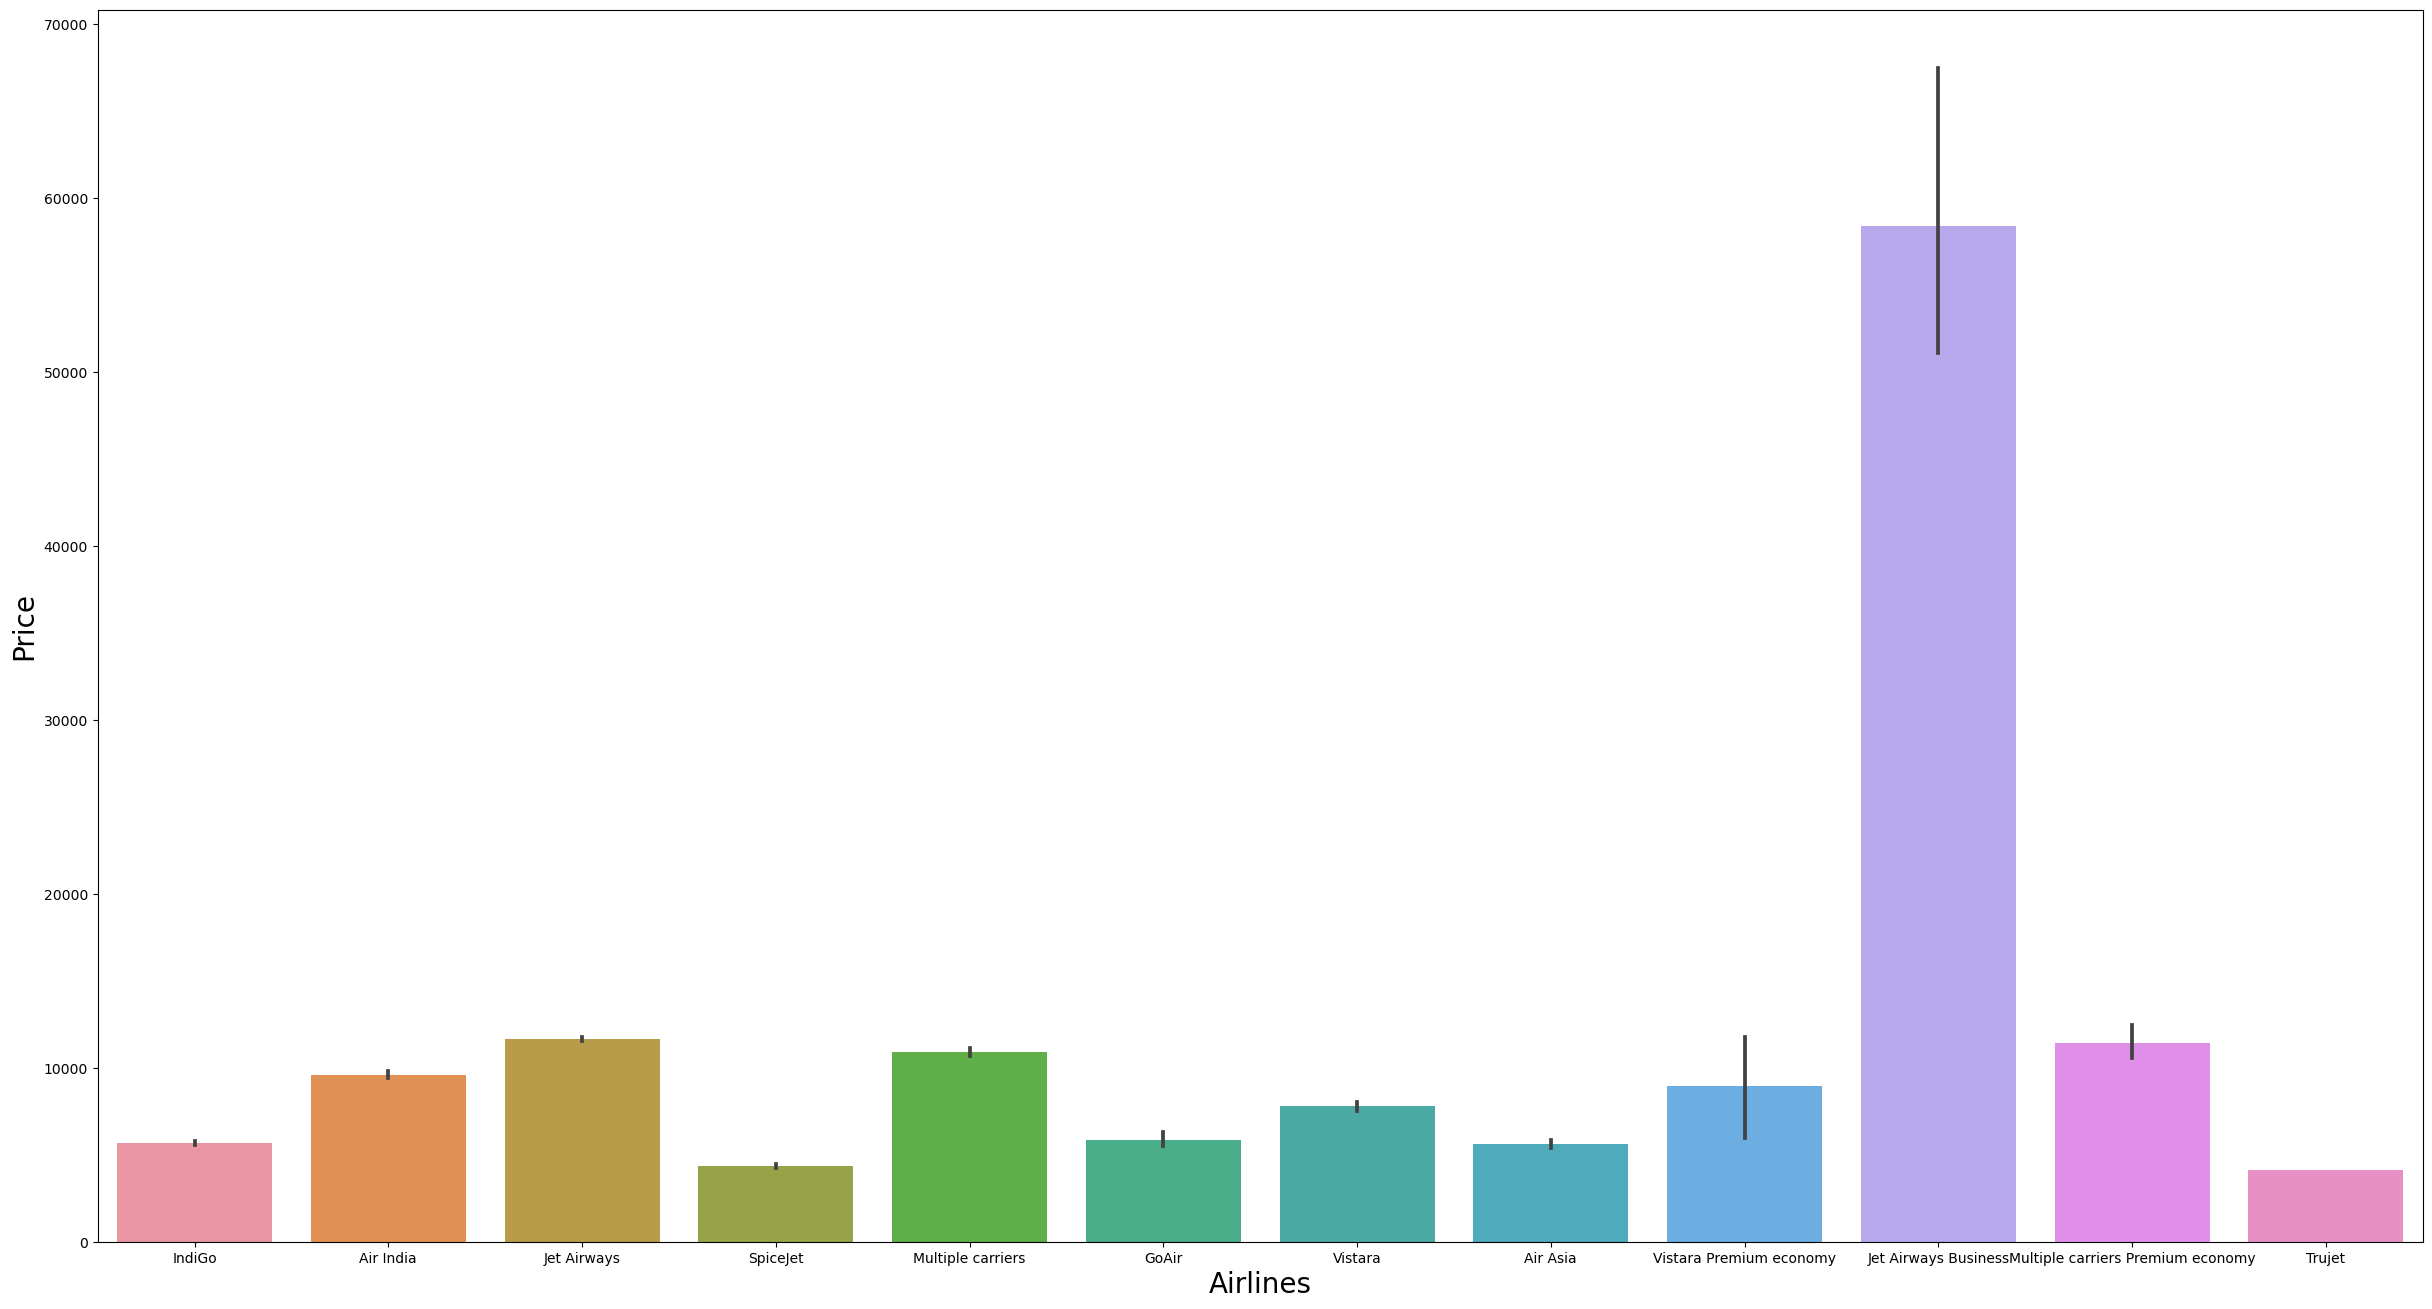

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(30,16))
sns.barplot(x='Airline',y='Price',data=data)

plt.xlabel('Airlines', size=20)
plt.ylabel('Price', size=20)
plt.show()
plt.tight_layout()

- Jet Airways Business airline is the most expensive compared to other airlines.
- Trujet is the least expensive airline.

- Costliest Flight Tickets Sold is of Jet Airways Business .
- Second Most Costliest Flight Tickets Sold is of Jet Airways .
- As can be seen, the airline’s name is important. The most expensive option is ‘JetAirways Business.’ The cost of other carriers varies as well.
- We’ll use one-hot encoding to handle the Airline variable because it’s Nominal Categorical Data (airline names have no order of any kind).

In [18]:
data.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

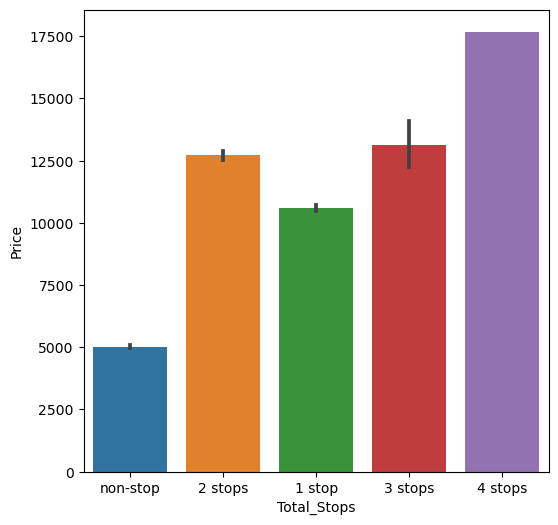

In [19]:
plt.figure(figsize=(6,6))
sns.barplot(x='Total_Stops',y='Price',data=data)
plt.xlabel('Total_Stops', size=10)
plt.ylabel('Price', size=10)
plt.show()

- Flight fare for more than 1 stop is quite high.

#### Multivariate Analysis

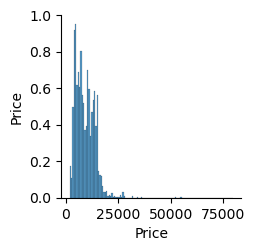

In [20]:
sns.pairplot(data)

### Data Preprocessing

#### Handling Missing Values

In [21]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [22]:
data.loc[data.Route.isnull()==True,'Route']

9039    NaN
Name: Route, dtype: object

In [23]:
data.loc[data.Total_Stops.isnull()==True,'Total_Stops']

9039    NaN
Name: Total_Stops, dtype: object

In [24]:
data['Route']=data['Route'].fillna(data['Route'].mode()[0])
data['Total_Stops']=data['Total_Stops'].fillna(data['Total_Stops'].mode()[0])

In [25]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

- Missing values are handled. 
- Mode is used to handle missing values as the columns are categorical.

#### Converting Categorical Into Numerical Columns

In [26]:
# Date_of_Journey is the day when plane departs. 
data["journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day
data["journey_month"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
data.head()
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
# Extracting Hours
data["dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
# Extracting Minutes
data["dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
# Now we drop Dep_Time as it is of no use
data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time
# Extracting Hours
data["arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
# Extracting Minutes
data["arrival_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute
# Now we can drop Arrival_Time as it is of no use
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [27]:
# Duration is the time taken by plane to reach destination
# It is the difference betwen Arrival Time and Departure time
# Assigning and converting Duration column into list, for looping through
duration = list(data["Duration"])
# In table above, Row Index=2, we have Duration = 19h (missing minutes)
# Looping through all duration values
# To ensure it has both hours & mins: 'xh ym'
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
# Prepare separate duration_hours and duration_mins lists
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
# Add duration_hours and duration_mins list to our dataset df
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins
# Drop Duration column from the dataset
data.drop(["Duration"], axis = 1, inplace = True)

In [28]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


- Since Airline, Source and Destination are nominal categorical data we apply OneHotEncoding.

In [29]:
df=data[['Airline']]
df=pd.get_dummies(df,drop_first=True)

df1=data[['Source']]
df1=pd.get_dummies(df1,drop_first=True)

df2=data[['Destination']]
df2=pd.get_dummies(df2,drop_first=True)

In [30]:
df=df.astype('int64')
df1=df1.astype('int64')
df2=df2.astype('int64')

In [31]:
d=pd.concat([df,df1,df2],axis=1)
d

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [32]:
data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [33]:
data=pd.concat([data,d],axis=1)

- We use manual encoding for Total_Stops.

In [34]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [35]:
data.Total_Stops=data.Total_Stops.map({'non-stop':0, '2 stops':1, '1 stop':2, '3 stops':3, '4 stops':4}) 

In [36]:
data

,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,1,No info,7662,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,1,No info,13882,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,2,No info,6218,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,2,No info,13302,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,0,No info,4107,9,4,19,55,22,25,...,0,0,0,1,0,0,0,0,0,0
10679,CCU → BLR,0,No info,4145,27,4,20,45,23,20,...,0,0,0,1,0,0,0,0,0,0
10680,BLR → DEL,0,No info,7229,27,4,8,20,11,20,...,0,0,0,0,0,0,1,0,0,0
10681,BLR → DEL,0,No info,12648,1,3,11,30,14,10,...,0,0,0,0,0,0,0,0,0,1


#### Checking For Outliers

<Axes: xlabel='Price'>

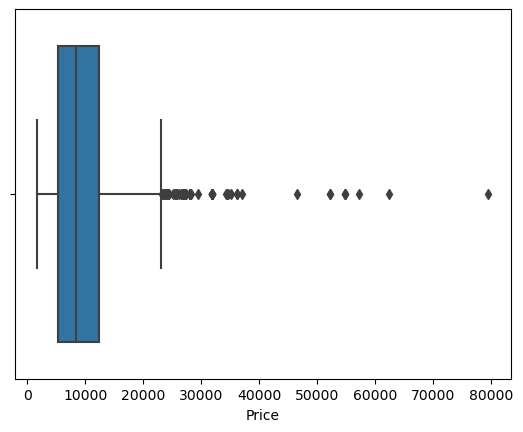

In [37]:
sns.boxplot(x='Price',data=data)

In [38]:
Q1=data['Price'].quantile(0.25)
print('lower quantile',Q1)
Q3=data['Price'].quantile(0.75)
print('upper quantile',Q3)

lower quantile 5277.0
upper quantile 12373.0


In [39]:
IQR=Q3-Q1
IQR

7096.0

In [40]:
lower_limit=Q1-1.5*IQR
print('Lower limit is : ',lower_limit)
upper_limit=Q3+1.5*IQR
print('Upper limit is : ',upper_limit)

Lower limit is :  -5367.0
Upper limit is :  23017.0


- Handle Outliers only if data has less than 5% of the outliers.
- Since, Price does not follow normal distribution, median is used to handle outliers.

In [41]:
len(data.loc[data['Price']>upper_limit])/len(data)

0.008799026490686137

In [42]:
data.loc[data['Price']>23017.0,'Price']=np.median(data['Price'])

<Axes: xlabel='Price'>

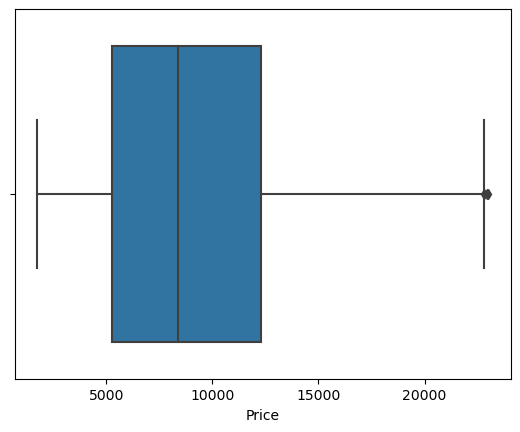

In [43]:
sns.boxplot(x='Price',data=data)

- Outliers are handled.

#### Scaling

In [44]:
data

,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,1,No info,7662,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,1,No info,13882,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,2,No info,6218,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,2,No info,13302,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,0,No info,4107,9,4,19,55,22,25,...,0,0,0,1,0,0,0,0,0,0
10679,CCU → BLR,0,No info,4145,27,4,20,45,23,20,...,0,0,0,1,0,0,0,0,0,0
10680,BLR → DEL,0,No info,7229,27,4,8,20,11,20,...,0,0,0,0,0,0,1,0,0,0
10681,BLR → DEL,0,No info,12648,1,3,11,30,14,10,...,0,0,0,0,0,0,0,0,0,1


In [45]:
data.columns

Index(['Route', 'Total_Stops', 'Additional_Info', 'Price', 'journey_day',
       'journey_month', 'dep_hour', 'dep_min', 'arrival_hour', 'arrival_min',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [46]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data[['Price','journey_day','journey_month','dep_hour','dep_min','arrival_hour','arrival_min','Duration_hours','Duration_mins']]=scale.fit_transform(data[['Price','journey_day','journey_month','dep_hour','dep_min','arrival_hour','arrival_min','Duration_hours','Duration_mins']])

In [47]:
data

,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,No info,-1.233198,1.237383,-1.467490,1.654259,-0.235050,-1.800427,-0.890057,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,1,No info,-0.303863,-1.475239,0.250276,-1.303095,1.363492,-0.050851,-0.587124,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,1,No info,1.231452,-0.531719,1.109160,-0.607247,0.031373,-1.363033,0.018744,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,2,No info,-0.660293,-0.177898,0.250276,0.958411,-1.034321,1.407129,0.321677,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,2,No info,1.088288,-1.475239,-1.467490,0.610487,1.363492,1.115533,0.624611,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU → BLR,0,No info,-1.181363,-0.531719,-0.608607,1.132373,1.629915,1.261331,0.018744,...,0,0,0,1,0,0,0,0,0,0
10679,CCU → BLR,0,No info,-1.171983,1.591203,-0.608607,1.306335,1.097068,1.407129,-0.284190,...,0,0,0,1,0,0,0,0,0,0
10680,BLR → DEL,0,No info,-0.410743,1.591203,-0.608607,-0.781209,-0.235050,-0.342447,-0.284190,...,0,0,0,0,0,0,1,0,0,0
10681,BLR → DEL,0,No info,0.926857,-1.475239,-1.467490,-0.259323,0.297797,0.094947,-0.890057,...,0,0,0,0,0,0,0,0,0,1


In [48]:
data.duplicated().sum()

222

In [49]:
data.loc[data.duplicated(keep=False),:]

,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
33,DEL → NAG → BOM → COK,1,In-flight meal not included,0.500079,0.175922,1.109160,0.262563,0.564221,-0.196649,0.624611,...,0,0,1,0,0,1,0,0,0,0
49,DEL → AMD → BOM → COK,1,In-flight meal not included,0.557098,1.591203,1.109160,1.828221,-1.034321,0.823937,-1.495925,...,0,0,1,0,0,1,0,0,0,0
73,DEL → AMD → BOM → COK,1,No info,0.969066,1.237383,1.109160,1.828221,-1.034321,-0.196649,0.624611,...,0,0,1,0,0,1,0,0,0,0
81,BLR → DEL,0,No info,-0.410743,1.237383,-1.467490,1.132373,1.629915,1.261331,0.624611,...,0,0,0,0,0,0,0,0,0,1
87,DEL → JAI → BOM → COK,1,No info,1.017199,-0.885539,1.109160,-0.607247,0.830644,-1.363033,0.018744,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10594,DEL → AMD → BOM → COK,1,No info,0.969066,1.591203,1.109160,1.828221,-1.034321,-0.196649,0.624611,...,0,0,1,0,0,1,0,0,0,0
10616,DEL → JAI → BOM → COK,1,No info,1.017199,-1.475239,1.109160,-0.607247,0.830644,-0.196649,0.624611,...,0,0,1,0,0,1,0,0,0,0
10634,DEL → JAI → BOM → COK,1,In-flight meal not included,0.701003,-0.885539,1.109160,-0.607247,0.830644,-0.196649,0.624611,...,0,0,1,0,0,1,0,0,0,0
10672,DEL → AMD → BOM → COK,1,In-flight meal not included,0.557098,1.591203,1.109160,1.828221,-1.034321,0.823937,-1.495925,...,0,0,1,0,0,1,0,0,0,0


In [50]:
data.drop_duplicates(keep='first',inplace=True)

In [51]:
data.shape

(10461, 32)

In [52]:
data.duplicated().sum()

0

In [53]:
data.isnull().sum()

Route                                        0
Total_Stops                                  0
Additional_Info                              0
Price                                        0
journey_day                                  0
journey_month                                0
dep_hour                                     0
dep_min                                      0
arrival_hour                                 0
arrival_min                                  0
Duration_hours                               0
Duration_mins                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vista

#### Feature Selection

##### Removing Unwanted Columns

- Route is a redundant feature, as we have Total_Stops that also captures similar information on Stoppages.
- For Additional_Info, 80% of the observations say no_info, so doesn’t add much value.
- These 2 columns can be dropped.

In [54]:
data.drop(['Route','Additional_Info'],axis=1,inplace=True)
data

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,-1.233198,1.237383,-1.467490,1.654259,-0.235050,-1.800427,-0.890057,-0.970698,1.279008,...,0,0,0,0,0,0,0,0,0,1
1,1,-0.303863,-1.475239,0.250276,-1.303095,1.363492,-0.050851,-0.587124,-0.382117,-0.196388,...,0,0,0,1,0,0,0,0,0,0
2,1,1.231452,-0.531719,1.109160,-0.607247,0.031373,-1.363033,0.018744,1.030476,-1.671784,...,0,0,1,0,0,1,0,0,0,0
3,2,-0.660293,-0.177898,0.250276,0.958411,-1.034321,1.407129,0.321677,-0.617549,-0.196388,...,0,0,0,1,0,0,0,0,0,0
4,2,1.088288,-1.475239,-1.467490,0.610487,1.363492,1.115533,0.624611,-0.735265,0.983929,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,-1.181363,-0.531719,-0.608607,1.132373,1.629915,1.261331,0.018744,-0.970698,0.098691,...,0,0,0,1,0,0,0,0,0,0
10679,0,-1.171983,1.591203,-0.608607,1.306335,1.097068,1.407129,-0.284190,-0.970698,0.393770,...,0,0,0,1,0,0,0,0,0,0
10680,0,-0.410743,1.591203,-0.608607,-0.781209,-0.235050,-0.342447,-0.284190,-0.852981,-1.671784,...,0,0,0,0,0,0,1,0,0,0
10681,0,0.926857,-1.475239,-1.467490,-0.259323,0.297797,0.094947,-0.890057,-0.970698,0.688849,...,0,0,0,0,0,0,0,0,0,1


In [55]:
data.corr()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.564856,-0.034000,0.012045,-0.038208,-0.057876,0.107876,-0.183810,0.545596,-0.181233,...,-0.022425,-0.257409,0.441525,0.121379,-0.301921,0.441525,-0.491062,-0.301921,-0.257409,0.042319
Price,0.564856,1.000000,-0.121446,-0.059212,0.005221,-0.053462,0.045773,-0.097284,0.567492,-0.146932,...,0.000557,-0.193852,0.322320,0.046301,-0.256081,0.322320,-0.337400,-0.256081,-0.193852,0.108849
journey_day,-0.034000,-0.121446,1.000000,-0.038363,-0.003387,-0.004928,-0.002428,-0.015125,-0.029514,-0.009236,...,-0.020263,0.007762,0.095794,-0.057370,-0.012738,0.095794,0.004708,-0.012738,0.007762,-0.076036
journey_month,0.012045,-0.059212,-0.038363,1.000000,0.040874,-0.062723,0.000902,-0.099581,0.006181,-0.045963,...,-0.019920,0.006840,0.130665,0.091560,-0.038276,0.130665,0.093778,-0.038276,0.006840,-0.452008
dep_hour,-0.038208,0.005221,-0.003387,0.040874,1.000000,-0.015032,-0.003222,0.073340,-0.000433,-0.019291,...,-0.003381,-0.014570,-0.125118,0.160758,-0.016871,-0.125118,0.010570,-0.016871,-0.014570,-0.023047
dep_min,-0.057876,-0.053462,-0.004928,-0.062723,-0.015032,1.000000,0.046372,-0.021437,-0.022051,0.089466,...,-0.011469,0.067674,-0.087817,-0.023454,0.038044,-0.087817,0.003249,0.038044,0.067674,0.108138
arrival_hour,0.107876,0.045773,-0.002428,0.000902,-0.003222,0.046372,1.000000,-0.152461,0.065178,-0.116327,...,0.000685,-0.016116,-0.001624,0.054504,-0.035493,-0.001624,-0.033449,-0.035493,-0.016116,-0.002539
arrival_min,-0.183810,-0.097284,-0.015125,-0.099581,0.073340,-0.021437,-0.152461,1.000000,-0.076136,0.156482,...,0.000283,-0.031092,-0.210295,0.117428,0.081273,-0.210295,0.095293,0.081273,-0.031092,0.020501
Duration_hours,0.545596,0.567492,-0.029514,0.006181,-0.000433,-0.022051,0.065178,-0.076136,1.000000,-0.133675,...,-0.016231,-0.186311,0.280569,0.140570,-0.232341,0.280569,-0.345630,-0.232341,-0.186311,0.016364
Duration_mins,-0.181233,-0.146932,-0.009236,-0.045963,-0.019291,0.089466,-0.116327,0.156482,-0.133675,1.000000,...,0.005144,-0.098929,-0.163251,0.018269,-0.017157,-0.163251,0.224332,-0.017157,-0.098929,0.077907


##### Checking For Collinearity

<Axes: >

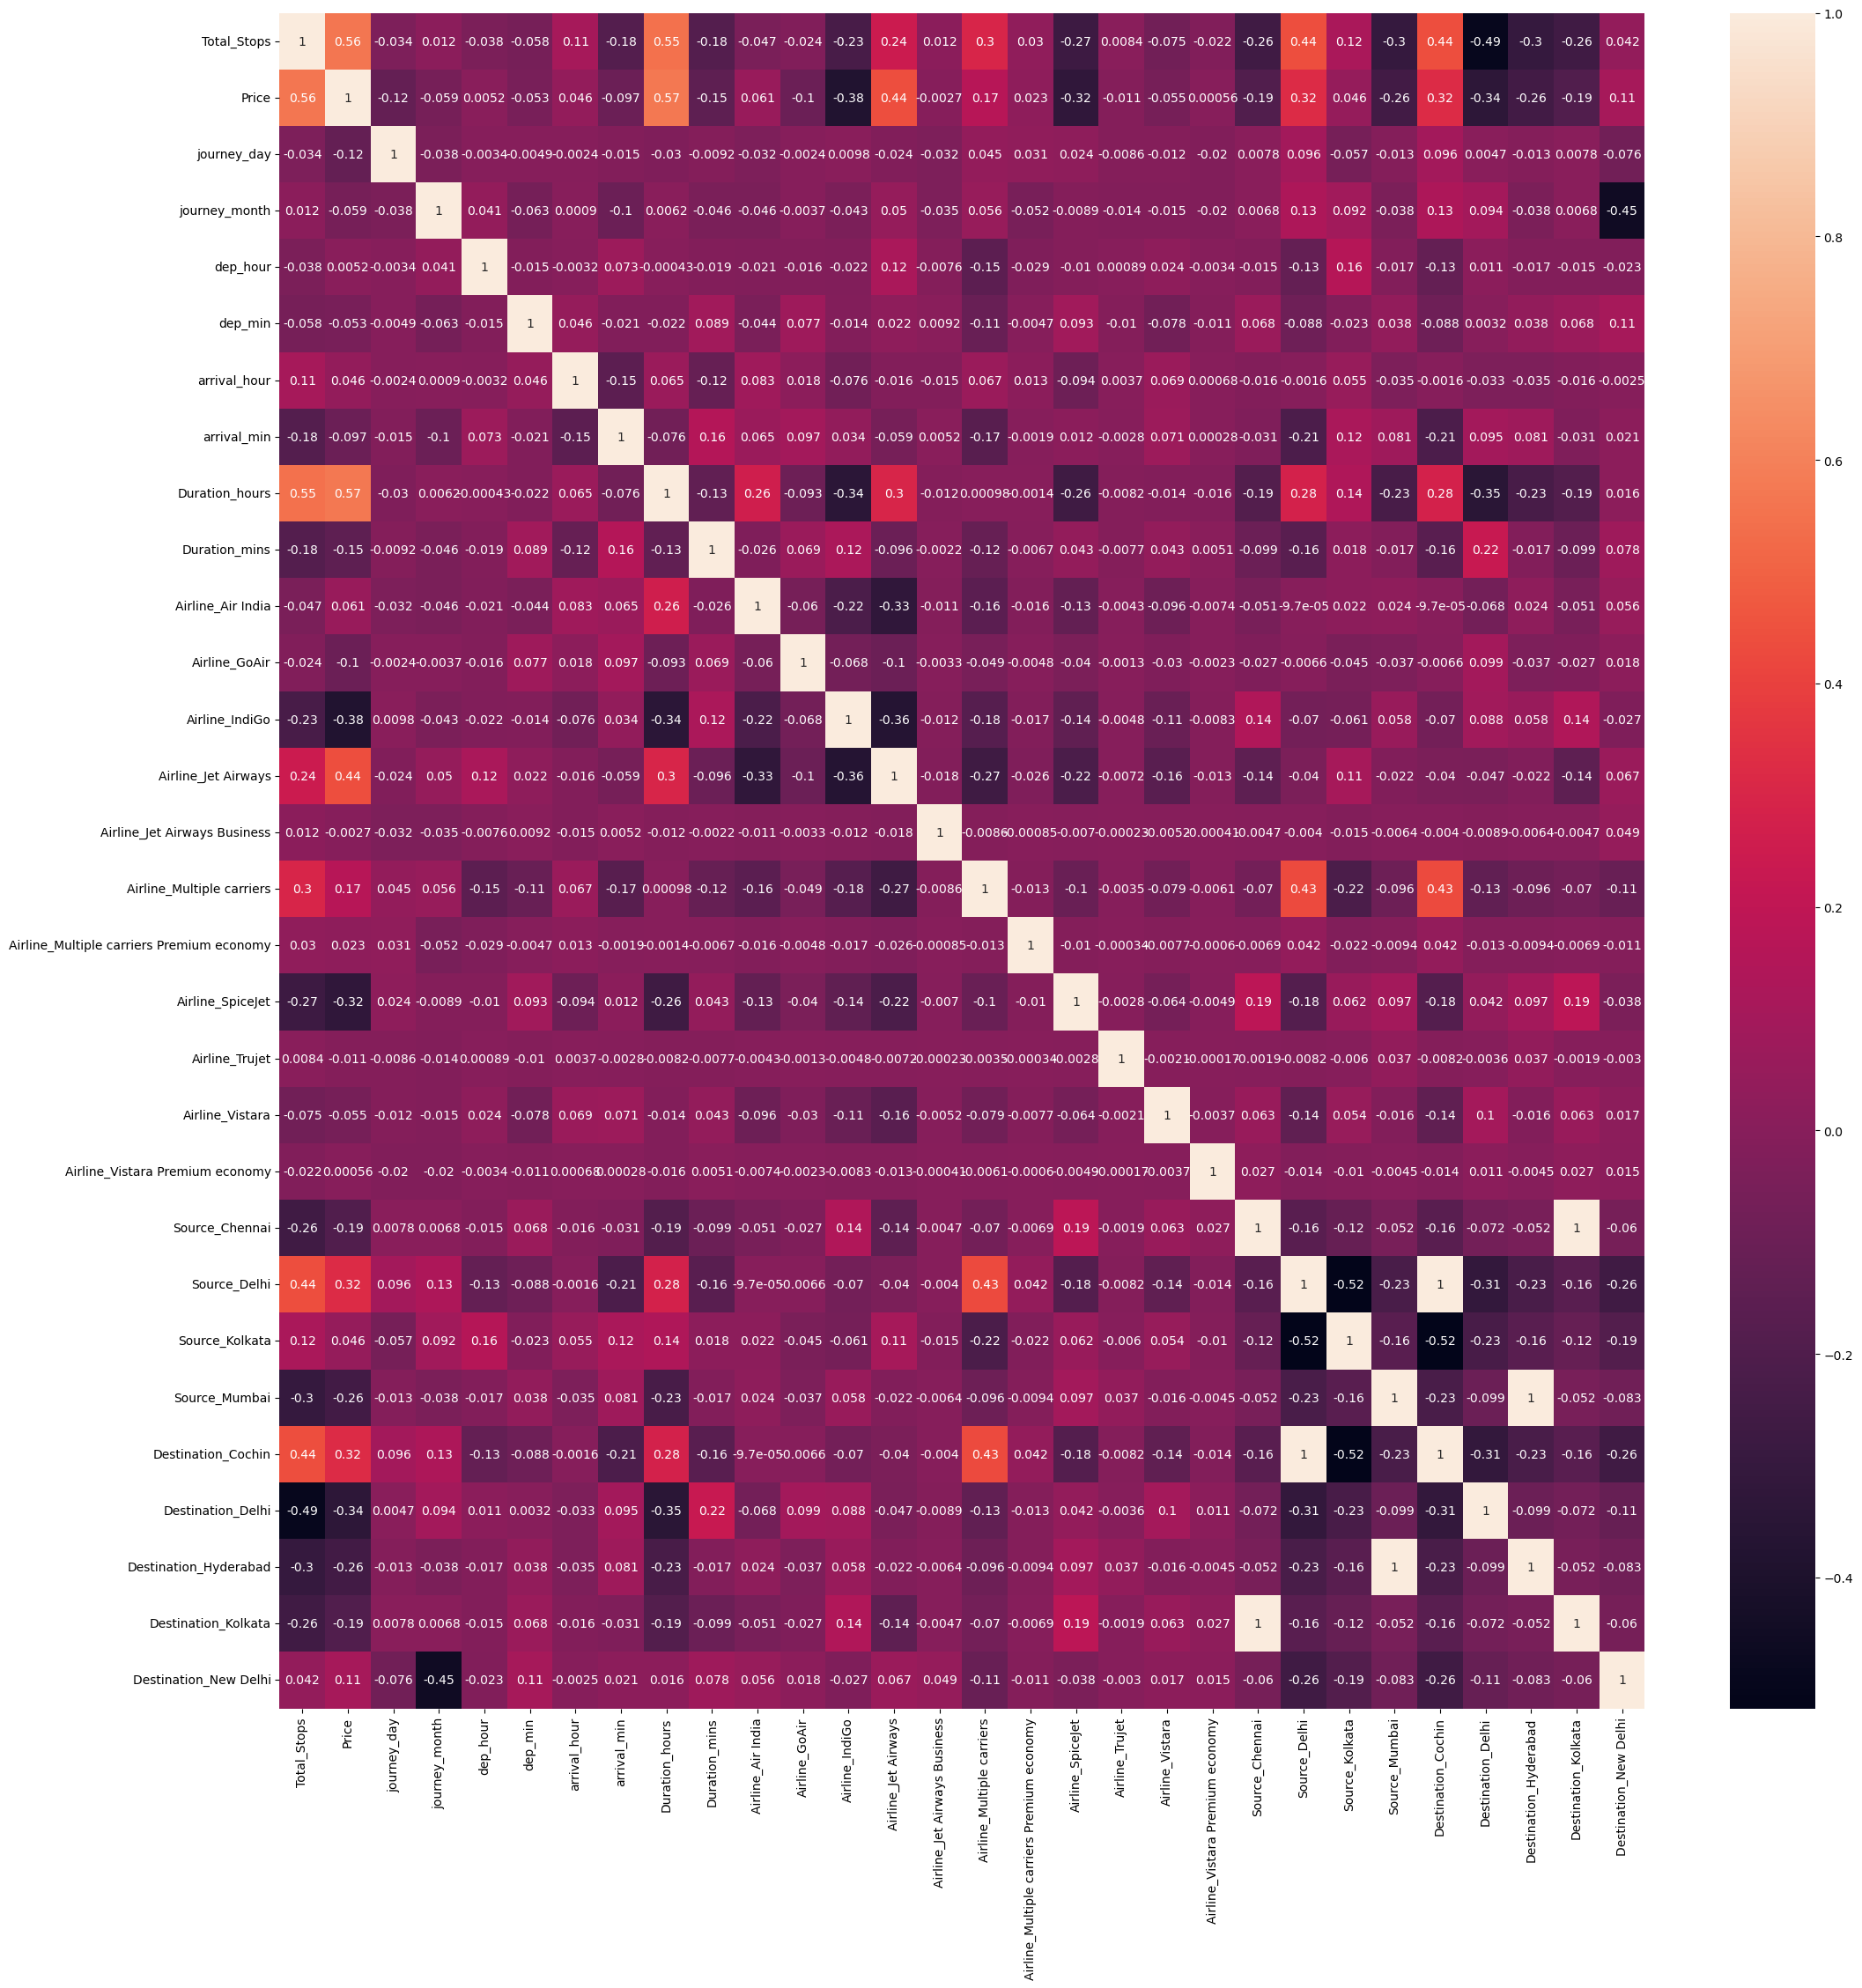

In [56]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True)

##### Checking For Multicollinearity

<Axes: >

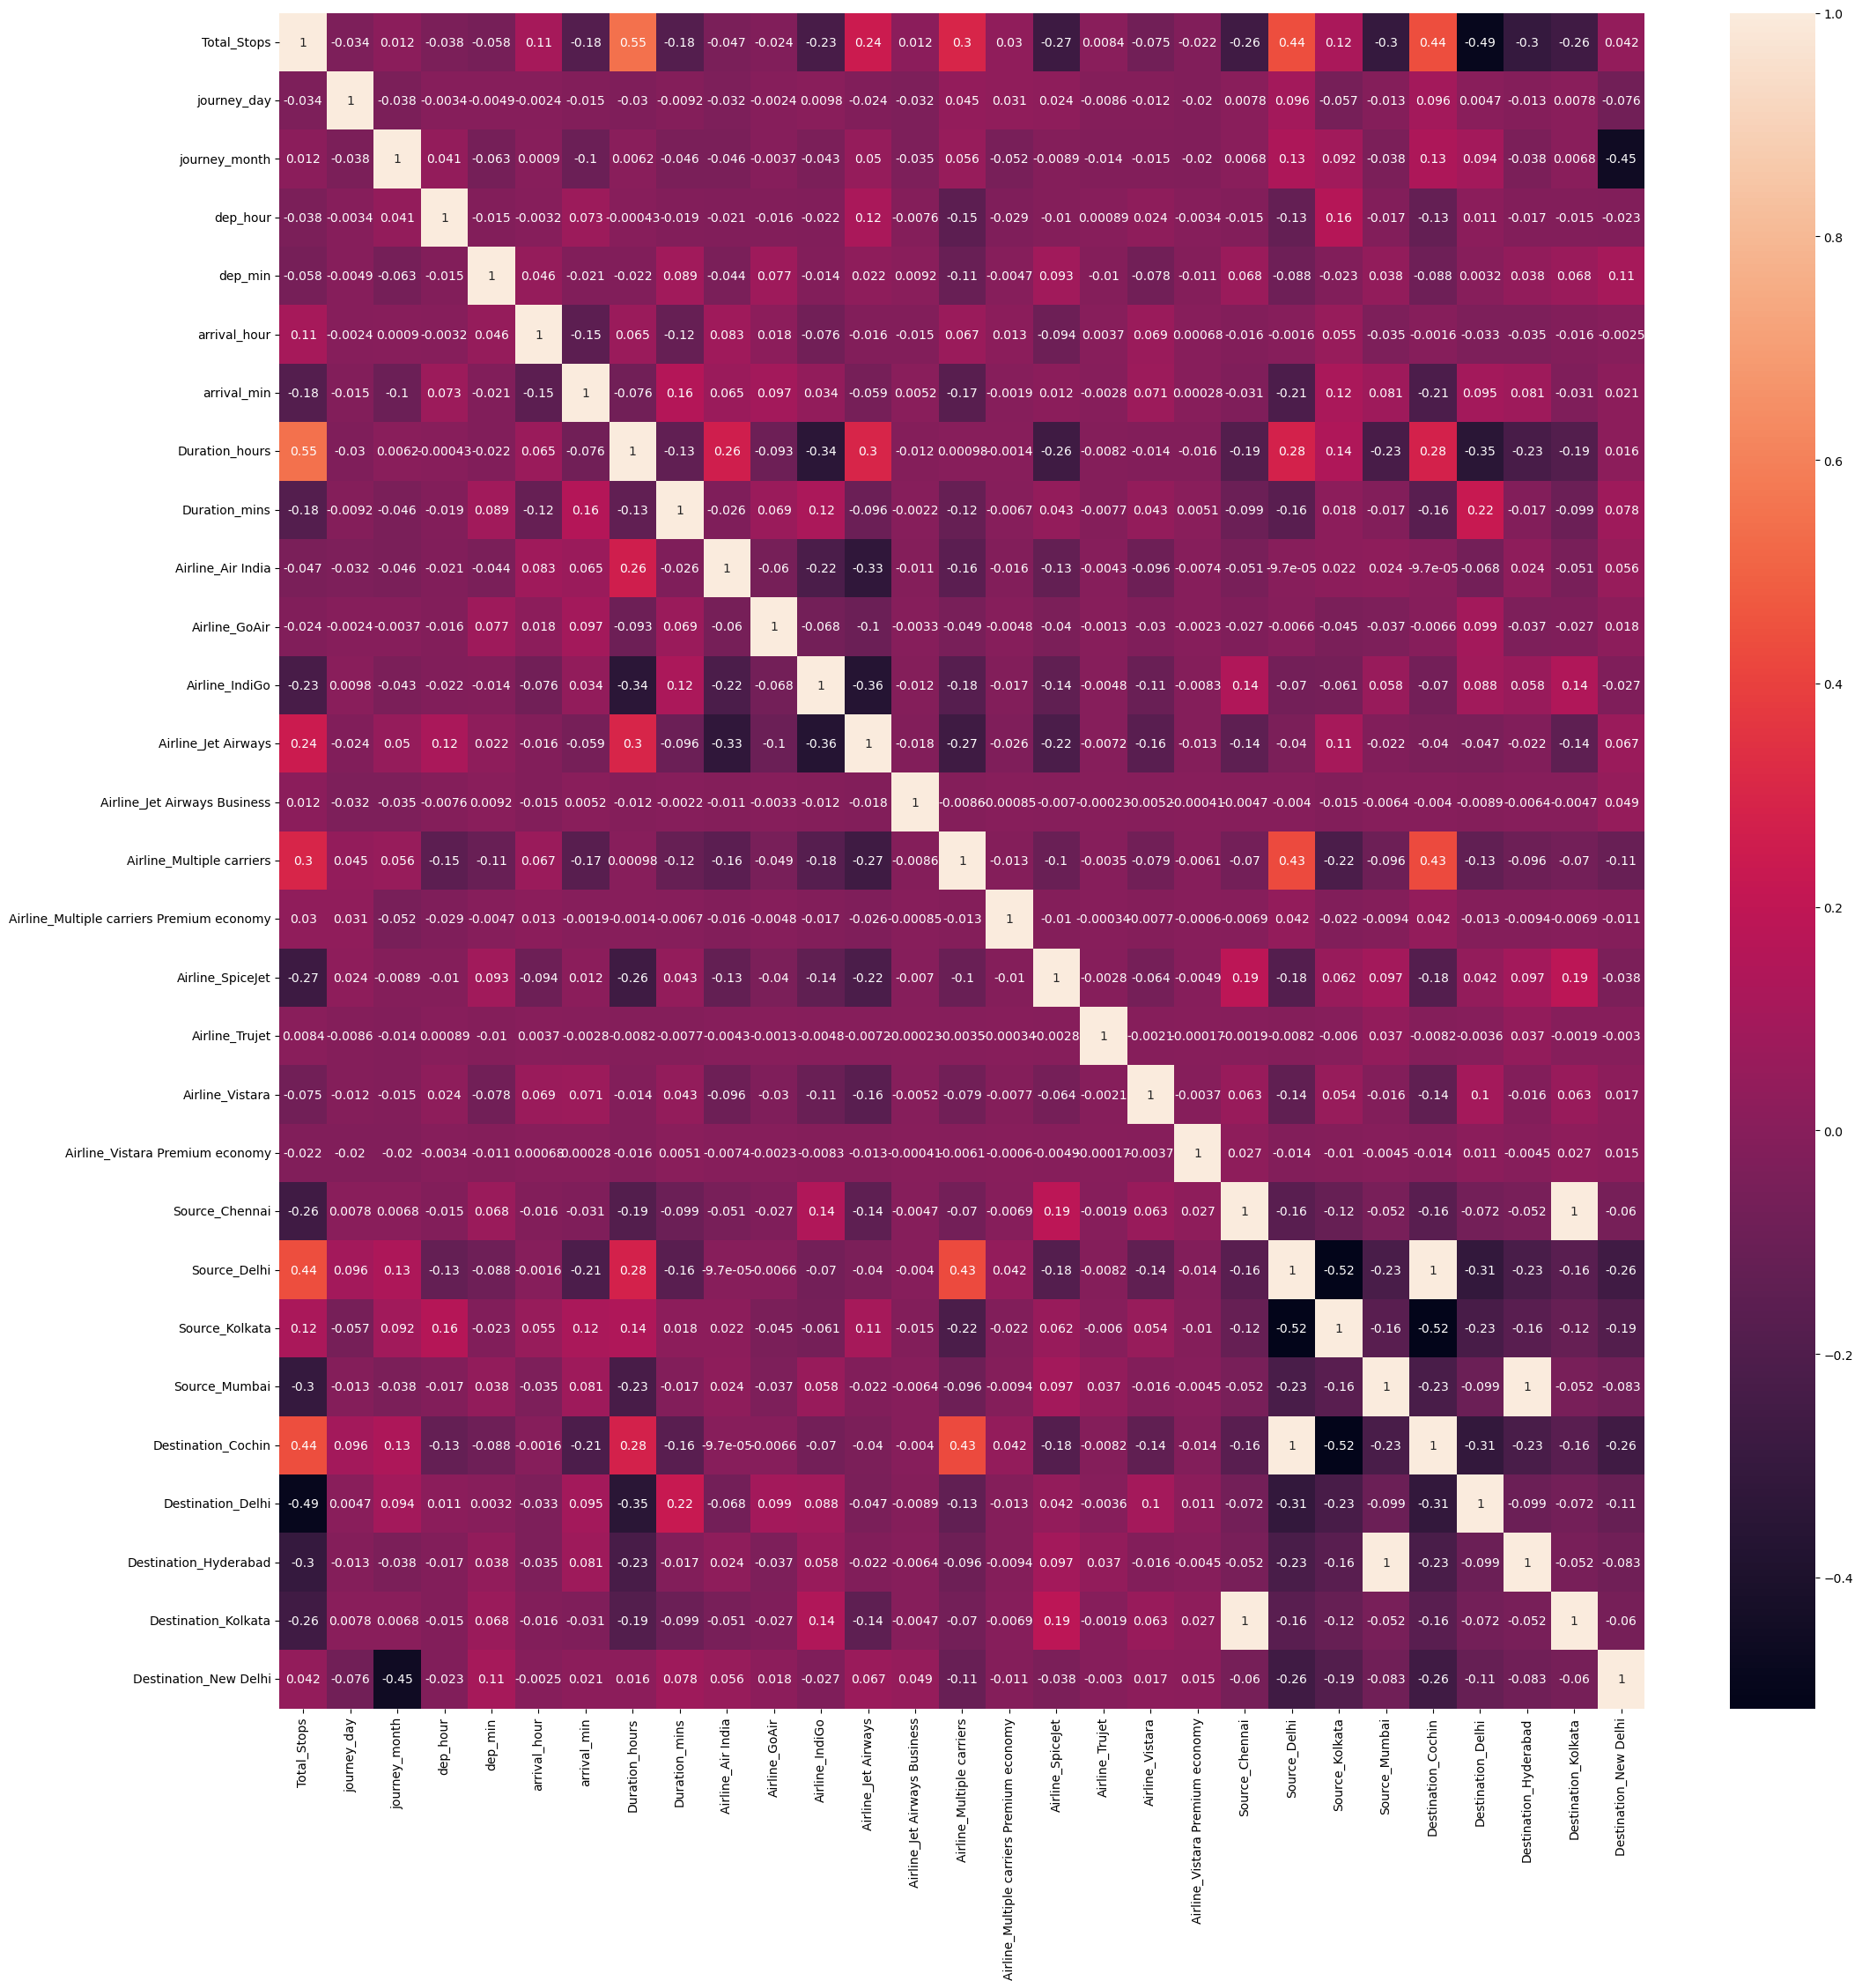

In [57]:
plt.figure(figsize=(25,25))
sns.heatmap(data.drop('Price',axis=1).corr(),annot=True)

#### Model Creation

##### Creating Independent And Dependent Variables

In [58]:
X=data.drop('Price',axis=1)
y=data.Price

In [59]:
X

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,1.237383,-1.467490,1.654259,-0.235050,-1.800427,-0.890057,-0.970698,1.279008,0,...,0,0,0,0,0,0,0,0,0,1
1,1,-1.475239,0.250276,-1.303095,1.363492,-0.050851,-0.587124,-0.382117,-0.196388,1,...,0,0,0,1,0,0,0,0,0,0
2,1,-0.531719,1.109160,-0.607247,0.031373,-1.363033,0.018744,1.030476,-1.671784,0,...,0,0,1,0,0,1,0,0,0,0
3,2,-0.177898,0.250276,0.958411,-1.034321,1.407129,0.321677,-0.617549,-0.196388,0,...,0,0,0,1,0,0,0,0,0,0
4,2,-1.475239,-1.467490,0.610487,1.363492,1.115533,0.624611,-0.735265,0.983929,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,-0.531719,-0.608607,1.132373,1.629915,1.261331,0.018744,-0.970698,0.098691,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,1.591203,-0.608607,1.306335,1.097068,1.407129,-0.284190,-0.970698,0.393770,1,...,0,0,0,1,0,0,0,0,0,0
10680,0,1.591203,-0.608607,-0.781209,-0.235050,-0.342447,-0.284190,-0.852981,-1.671784,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,-1.475239,-1.467490,-0.259323,0.297797,0.094947,-0.890057,-0.970698,0.688849,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
y

0       -1.233198
1       -0.303863
2        1.231452
3       -0.660293
4        1.088288
           ...   
10678   -1.181363
10679   -1.171983
10680   -0.410743
10681    0.926857
10682    0.705940
Name: Price, Length: 10461, dtype: float64

In [61]:
X.isnull().sum()

Total_Stops                                  0
journey_day                                  0
journey_month                                0
dep_hour                                     0
dep_min                                      0
arrival_hour                                 0
arrival_min                                  0
Duration_hours                               0
Duration_mins                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi 

In [62]:
y.isnull().sum()

0

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=2)             

In [64]:
X_test.shape

(2093, 29)

In [65]:
y_test.shape

(2093,)

In [66]:
X_train.shape

(8368, 29)

#### Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression          # Importing Linear Regression from sklearn.linear_model
LR=LinearRegression()                                      # Object Creation For Linear Regression

LR.fit(X_train,y_train)                                    # Training The Model ( Linear Regression )

LinearRegression()

In [68]:
y_pred=LR.predict(X_test)          # Prediction
y_pred                             # Predicted Values By Model

array([-0.25884996,  0.07231655,  0.70992639, ..., -1.19649495,
        0.02879402,  0.984697  ])

In [69]:
y_test                             # Actual Values

3773   -0.150085
8265    0.801465
7136    1.017199
3951    1.304515
1671   -1.307249
          ...   
2618   -0.128610
3089    0.764934
1066   -1.255413
6944    0.678541
2575    0.858978
Name: Price, Length: 2093, dtype: float64

##### Model Evaluation

In [70]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error  # Importing Mertics To Check Model Performance
r1=r2_score(y_test,y_pred)     
r1

0.5818245556665933

In [71]:
# Calculation of Adjusted r2score
ad1 = 1-(1-0.5818245556665933)*(2093-1)/(2093-29-1)
ad1

0.575946180540239

In [72]:
lr_mse=mean_squared_error(y_test,y_pred)
lr_mse

0.4119845883177027

In [73]:
import math

print('MSE : ',mean_squared_error(y_test,y_pred))
print('RMSE : ',math.sqrt(mean_squared_error(y_test,y_pred))) 
print('MAE : ',mean_absolute_error(y_test,y_pred))

MSE :  0.4119845883177027
RMSE :  0.6418602560664608
MAE :  0.4922513916705244


#### KNN

In [74]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [75]:
yk_pred=knr.predict(X_test)
yk_pred

array([ 0.10489601,  1.04780677,  0.36407305, ..., -1.30761888,
        0.62670579,  0.33790851])

In [76]:
y_test

3773   -0.150085
8265    0.801465
7136    1.017199
3951    1.304515
1671   -1.307249
          ...   
2618   -0.128610
3089    0.764934
1066   -1.255413
6944    0.678541
2575    0.858978
Name: Price, Length: 2093, dtype: float64

In [77]:
r2=r2_score(y_test,yk_pred)
r2

0.6935876704927932

In [78]:
ad2 = 1-(1-0.6935876704927932)*(2093-1)/(2093-29-1)
ad2

0.6892803716291437

In [79]:
kn_mse=mean_squared_error(y_test,yk_pred)
kn_mse

0.3018760645516223

In [80]:
print('MSE : ',mean_squared_error(y_test,yk_pred))
print('RMSE : ',math.sqrt(mean_squared_error(y_test,yk_pred))) 
print('MAE : ',mean_absolute_error(y_test,yk_pred))

MSE :  0.3018760645516223
RMSE :  0.5494324931705644
MAE :  0.34805791064250763


#### SVM

In [81]:
from sklearn.svm import SVR
svregressor = SVR()                           # Base model with default parameters
svregressor.fit(X_train, y_train)

SVR()

In [82]:
ytr_pred=svregressor.predict(X_test)
ytr_pred

array([ 0.08039567,  1.0732599 ,  0.77589479, ..., -1.37193827,
        0.63056441,  0.73049284])

In [83]:
y_test

3773   -0.150085
8265    0.801465
7136    1.017199
3951    1.304515
1671   -1.307249
          ...   
2618   -0.128610
3089    0.764934
1066   -1.255413
6944    0.678541
2575    0.858978
Name: Price, Length: 2093, dtype: float64

In [84]:
r3=r2_score(y_test,ytr_pred)
r3

0.731542858326968

In [85]:
ad3 = 1-(1-0.731542858326968)*(2093-1)/(2093-29-1)
ad3

0.7277691030635081

In [86]:
svm_mse=mean_squared_error(y_test,ytr_pred)
svm_mse

0.26448278226717437

In [87]:
print('MSE : ',mean_squared_error(y_test,ytr_pred))
print('RMSE : ',math.sqrt(mean_squared_error(y_test,ytr_pred))) 
print('MAE : ',mean_absolute_error(y_test,ytr_pred))

MSE :  0.26448278226717437
RMSE :  0.5142788954129601
MAE :  0.3442365978992648


#### DT

In [88]:
from sklearn.tree import DecisionTreeRegressor        # Importing decision tree from sklearn.tree
dt=DecisionTreeRegressor()                            # Object creation for decision tree
dt.fit(X_train,y_train)                                # Training the model
y_hat=dt.predict(X_test)                               # Prediction
y_hat                                                  # Predicted values

array([ 0.35987685,  1.07372448,  0.36407305, ..., -1.24257778,
        0.62670579,  0.85897778])

In [89]:
y_test

3773   -0.150085
8265    0.801465
7136    1.017199
3951    1.304515
1671   -1.307249
          ...   
2618   -0.128610
3089    0.764934
1066   -1.255413
6944    0.678541
2575    0.858978
Name: Price, Length: 2093, dtype: float64

In [90]:
r4=r2_score(y_test,y_hat)
r4

0.6981535001075648

In [91]:
ad4 = 1-(1-0.6981535001075648)*(2093-1)/(2093-29-1)
ad4

0.6939103840160086

In [92]:
dt_mse=mean_squared_error(y_test,y_hat)
dt_mse

0.2973778295173559

In [93]:
print('MSE : ',mean_squared_error(y_test,y_hat))
print('RMSE : ',math.sqrt(mean_squared_error(y_test,y_hat))) 
print('MAE : ',mean_absolute_error(y_test,y_hat))

MSE :  0.2973778295173559
RMSE :  0.5453236007338724
MAE :  0.3283868253252977


#### Random Forest

In [94]:
from sklearn.ensemble import RandomForestRegressor    # Importing randomforest

rf_reg = RandomForestRegressor(n_estimators=100)      # Object creation ,taking 100 decision tree in random forest
rf_reg.fit(X_train,y_train)                           # Training the data

RandomForestRegressor()

In [95]:
y_predict=rf_reg.predict(X_test) #testing
y_predict

array([ 0.07242482,  1.05959723,  0.48823564, ..., -1.20016655,
        0.6614207 ,  0.80929601])

In [96]:
y_test

3773   -0.150085
8265    0.801465
7136    1.017199
3951    1.304515
1671   -1.307249
          ...   
2618   -0.128610
3089    0.764934
1066   -1.255413
6944    0.678541
2575    0.858978
Name: Price, Length: 2093, dtype: float64

In [97]:
r5=r2_score(y_test,y_predict)
r5

0.8015913130946974

In [98]:
ad5 = 1-(1-0.8015913130946974)*(2093-1)/(2093-29-1)
ad5

0.7988022428473617

In [99]:
rf_mse=mean_squared_error(y_test,y_predict)
rf_mse

0.19547135610422298

In [100]:
print('MSE : ',mean_squared_error(y_test,y_predict))
print('RMSE : ',math.sqrt(mean_squared_error(y_test,y_predict))) 
print('MAE : ',mean_absolute_error(y_test,y_predict))

MSE :  0.19547135610422298
RMSE :  0.44212142687752987
MAE :  0.28442999706831834


#### GB

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()              # Object creation
gbr.fit(X_train,y_train)                     # Fitting the data

GradientBoostingRegressor()

In [102]:
y_gbr=gbr.predict(X_test)
y_gbr

array([-0.30890399,  0.65450098,  0.94906651, ..., -1.14852905,
        0.53652487,  0.72550386])

In [103]:
y_test

3773   -0.150085
8265    0.801465
7136    1.017199
3951    1.304515
1671   -1.307249
          ...   
2618   -0.128610
3089    0.764934
1066   -1.255413
6944    0.678541
2575    0.858978
Name: Price, Length: 2093, dtype: float64

In [104]:
r6=r2_score(y_test,y_gbr)
r6

0.7383671389384977

In [105]:
ad6 = 1-(1-0.7383671389384977)*(2093-1)/(2093-29-1)
ad6

0.7346893139405415

In [106]:
gb_mse=mean_squared_error(y_test,y_gbr)
gb_mse

0.25775953135322544

In [107]:
print('MSE : ',mean_squared_error(y_test,y_gbr))
print('RMSE : ',math.sqrt(mean_squared_error(y_test,y_gbr))) 
print('MAE : ',mean_absolute_error(y_test,y_gbr))

MSE :  0.25775953135322544
RMSE :  0.5077002376927013
MAE :  0.37713285025610654


#### XGB

In [108]:
from xgboost import XGBRegressor       # Importing the model library
xgbr=XGBRegressor()                   # Object creation
xgbr.fit(X_train,y_train)             # Fitting the data

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [109]:
y_xgbr=xgbr.predict(X_test)
y_xgbr

array([-0.12610762,  1.1370265 ,  0.74040455, ..., -1.1795987 ,
        1.0703002 ,  0.9151199 ], dtype=float32)

In [110]:
y_test

3773   -0.150085
8265    0.801465
7136    1.017199
3951    1.304515
1671   -1.307249
          ...   
2618   -0.128610
3089    0.764934
1066   -1.255413
6944    0.678541
2575    0.858978
Name: Price, Length: 2093, dtype: float64

In [111]:
r7=r2_score(y_test,y_xgbr)
r7

0.8367931206337247

In [112]:
ad7 = 1-(1-0.8367931206337247)*(2093-1)/(2093-29-1)
ad7

0.8344988891738983

In [113]:
xgb_mse=mean_squared_error(y_test,y_xgbr)
xgb_mse

0.160790691843501

In [114]:
print('MSE : ',mean_squared_error(y_test,y_xgbr))
print('RMSE : ',math.sqrt(mean_squared_error(y_test,y_xgbr))) 
print('MAE : ',mean_absolute_error(y_test,y_xgbr))

MSE :  0.160790691843501
RMSE :  0.4009871467310405
MAE :  0.2746312889081928


In [115]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'KNN', 'Support Vector Machine','Decision Tree', 'Random Forest',
                'Gradient Boosting', 'XGBoost'],
    'MSE' : [lr_mse,kn_mse,svm_mse,dt_mse,rf_mse,gb_mse,xgb_mse],
    'r2_score' : [r1,r2,r3,r4,r5,r6,r7],
    'adjusted_r2score' : [ad1,ad2,ad3,ad4,ad5,ad6,ad7]
})

models.sort_values(by='MSE', ascending=True)

,Model,MSE,r2_score,adjusted_r2score
6,XGBoost,0.160791,0.836793,0.834499
4,Random Forest,0.195471,0.801591,0.798802
5,Gradient Boosting,0.257760,0.738367,0.734689
2,Support Vector Machine,0.264483,0.731543,0.727769
3,Decision Tree,0.297378,0.698154,0.693910
1,KNN,0.301876,0.693588,0.689280
0,Linear Regression,0.411985,0.581825,0.575946


- XGB is working well compared to other models.